In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## IMPORTING DATA SET

In [2]:
data=pd.read_csv("used_car_dataset.csv")

In [3]:
data.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [4]:
data.shape

(2105, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


## DATA HANDLING

In [6]:
data["car_price_in_rupees"] = data["car_price_in_rupees"].str.replace("₹", "", regex=False).str.replace("Lakh", "", regex=False).str.replace("Crore","",regex=False).str.replace(",","",regex=False).str.strip()

In [7]:
data["car_price_in_rupees"]=data.car_price_in_rupees.astype(float)*100000

In [8]:
data["kms_driven"]=data["kms_driven"].str.replace('km',"",regex=False).str.replace(",","",regex=False)

In [9]:
data["kms_driven"]=data["kms_driven"].astype(float)

In [10]:
data.describe()

,car_price_in_rupees,kms_driven,year_of_manufacture
count,2.105000e+03,2.105000e+03,2105.000000
mean,8.699513e+06,4.830131e+04,2017.022803
std,2.540809e+08,8.372047e+04,2.818066
min,1.100000e+05,6.400000e+01,2004.000000
25%,4.750000e+05,2.499300e+04,2015.000000
50%,6.950000e+05,4.282500e+04,2017.000000
75%,1.150000e+06,6.300000e+04,2019.000000
max,9.999100e+09,3.600000e+06,2022.000000


In [11]:
# CHECKING FOR NULL VALUES
data.isna().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

## HANDLING OUTLIERS

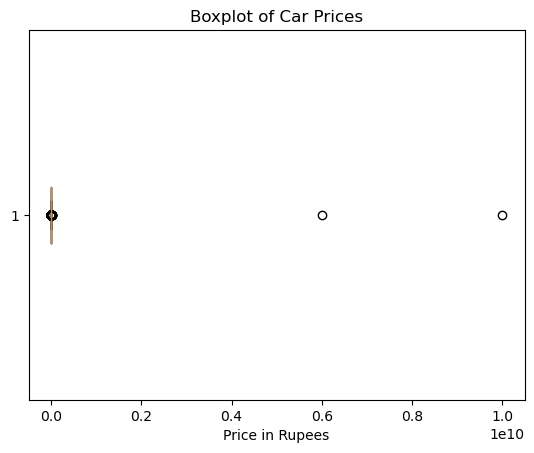

In [12]:
## car_price_in_rupee column
plt.boxplot(data["car_price_in_rupees"].dropna(), vert=False)
plt.title("Boxplot of Car Prices")
plt.xlabel("Price in Rupees")
plt.show()

In [13]:
## as we can see there outliers, we can use IQR to remove these outliers
q1=data['car_price_in_rupees'].quantile(0.25)
q3=data["car_price_in_rupees"].quantile(0.75)
IQR=q3-q1
lower_bound=q1-IQR*1.5
upper_bound=q3+IQR*1.5
data1=data[(data["car_price_in_rupees"]>lower_bound)&(data["car_price_in_rupees"]<upper_bound)]
data1.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,22402.0,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,293000.0,10344.0,Petrol,Kolkata,2019
3,Maruti Suzuki Ciaz ZXI+,695000.0,45000.0,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,11193.0,Petrol,Kolkata,2019
5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],372000.0,42906.0,Petrol,Chennai,2017


In [14]:
data1.shape

(1876, 6)

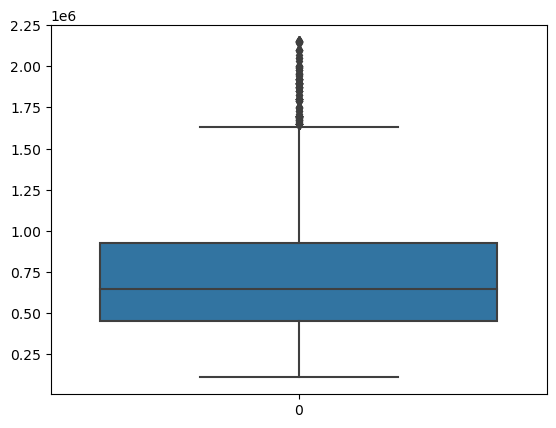

In [15]:
sns.boxplot(data1.car_price_in_rupees)
plt.show()

#### we still have outliers but comparitvely lesser than before

In [16]:
# kms_driven
q1=data1['kms_driven'].quantile(0.25)
q3=data1["kms_driven"].quantile(0.75)
IQR=q3-q1
lower_bound=q1-IQR*1.5
upper_bound=q3+IQR*1.5
data1=data1[(data1["kms_driven"]>lower_bound)&(data1["kms_driven"]<upper_bound)]
data1.shape

(1838, 6)

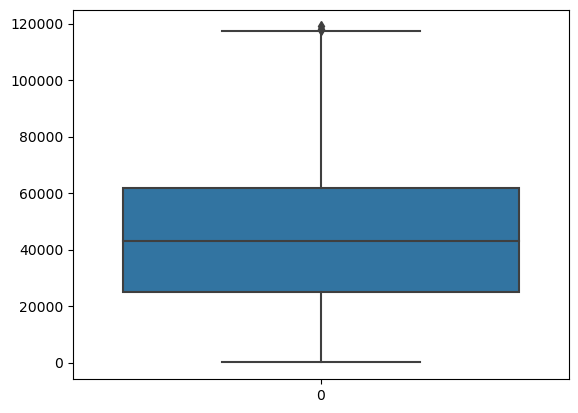

In [17]:
sns.boxplot(data1.kms_driven)
plt.show()

### ADDING COLUMNS FOR BETTER ANALYSIS

In [18]:
data1["manufacturer"]=data1["car_name"].str.split().str[0]
data1["car_age_2024"]=2024-data1.year_of_manufacture
data1.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,manufacturer,car_age_2024
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,22402.0,Petrol,Mumbai,2016,Hyundai,8
1,Maruti Suzuki Alto 800 Lxi,293000.0,10344.0,Petrol,Kolkata,2019,Maruti,5
3,Maruti Suzuki Ciaz ZXI+,695000.0,45000.0,Petrol,Thane,2016,Maruti,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,11193.0,Petrol,Kolkata,2019,Jeep,5
5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],372000.0,42906.0,Petrol,Chennai,2017,Maruti,7


In [19]:
data1.shape

(1838, 8)

In [20]:
# creating bins for price
avg_price=data1["car_price_in_rupees"].mean()
std_price=data1["car_price_in_rupees"].std()

bins=[
    -float("inf"),
    avg_price-2*std_price,
    avg_price-std_price,
    avg_price+std_price,
    avg_price+2*std_price,
    float("inf")
]

labels = ["Very Low Price", "Low Price", "Average Price", "High Price", "Very High Price"]

data1["price_category"]=pd.cut(data1["car_price_in_rupees"],bins=bins,labels=labels)

In [21]:
data1.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,manufacturer,car_age_2024,price_category
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,445000.0,22402.0,Petrol,Mumbai,2016,Hyundai,8,Average Price
1,Maruti Suzuki Alto 800 Lxi,293000.0,10344.0,Petrol,Kolkata,2019,Maruti,5,Low Price
3,Maruti Suzuki Ciaz ZXI+,695000.0,45000.0,Petrol,Thane,2016,Maruti,8,Average Price
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],1200000.0,11193.0,Petrol,Kolkata,2019,Jeep,5,High Price
5,Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020],372000.0,42906.0,Petrol,Chennai,2017,Maruti,7,Average Price


## ANALYSIS

### We will be comparing the factors which are influencing the price of the car.
### For this we will be individually comparing all the columns with price using visualisation

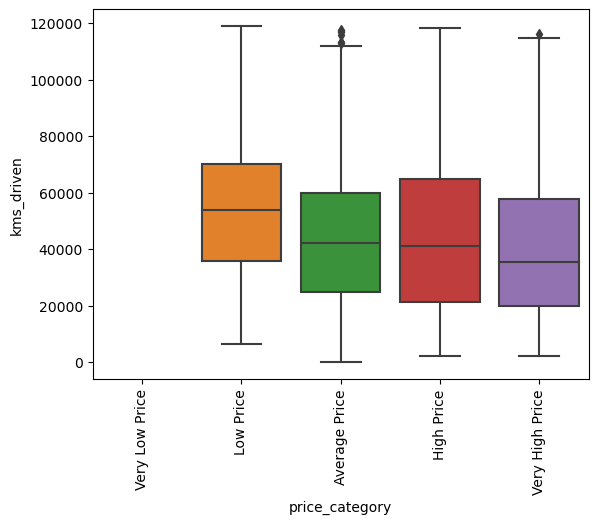

In [22]:
# price category vs kms driven
sns.boxplot(data=data1,x=data1["price_category"],y=data1["kms_driven"])
plt.xticks(rotation=90)
plt.show()

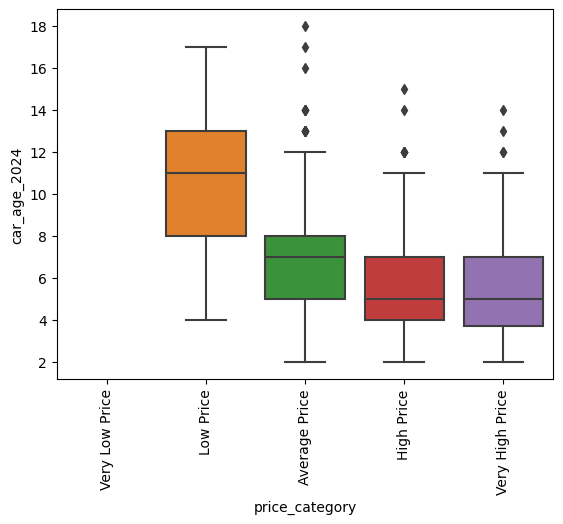

In [23]:
# price category vs car age
sns.boxplot(data=data1,x=data1["price_category"],y=data1["car_age_2024"])
plt.xticks(rotation=90)
plt.show()

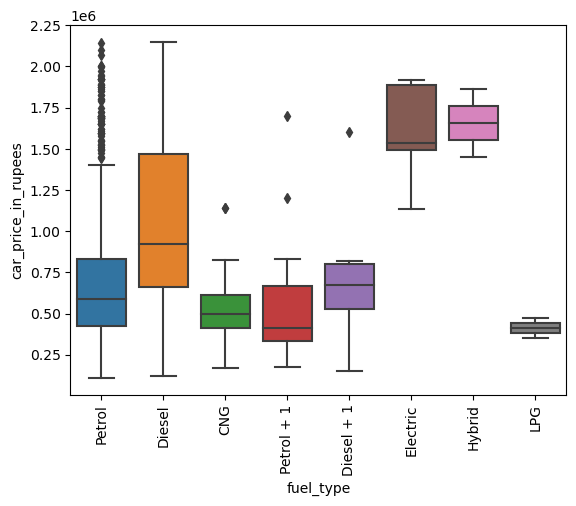

In [24]:
# price vs fuel type
sns.boxplot(data=data1,x=data1["fuel_type"],y=data1["car_price_in_rupees"])
plt.xticks(rotation=90)
plt.show()

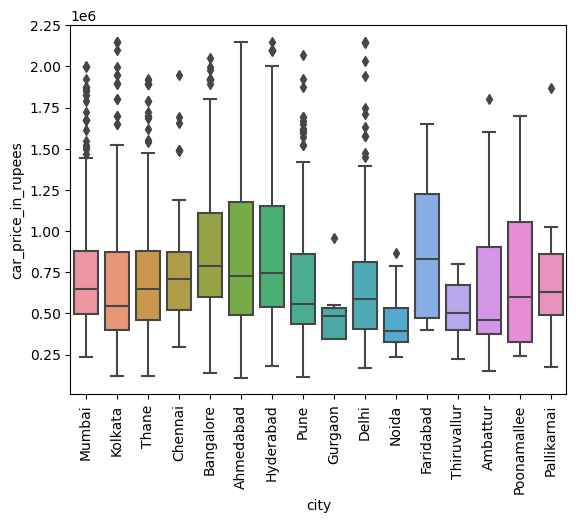

In [25]:
#price vs city
sns.boxplot(data=data1,x=data1["city"],y=data1["car_price_in_rupees"])
plt.xticks(rotation=90)
plt.show()

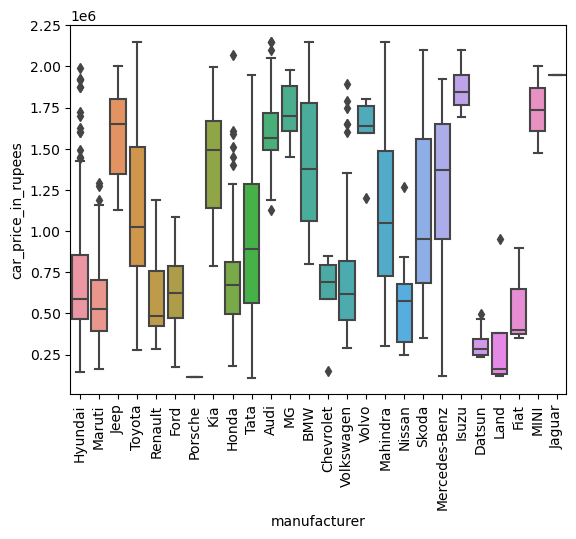

In [26]:
#price vs manufacturer
sns.boxplot(data=data1,x=data1["manufacturer"],y=data1["car_price_in_rupees"])
plt.xticks(rotation=90)
plt.show()

## Inferences
### 1. We can see that the price varies with the kilometers the cars has been driven. Cars which have high number of kilometers tend to have lower price and vice versa.
### 2. Cars age matter a lot with the price range.Older cars tend to be very cheaper than the fresher cars.
### 3. From fuel type and car price comparison we can see that the electric and hybrid cars tend to fetch higer value as compared any other fuel type. After these two variants Diesel cars fetch the thrid higest value in used cars
### 4. During our city wise comparison, Bangalore and Faridabad have high priced cars as compared to Gurgaon and Noida where the used car value is among the lowest
### 5. Hyundai,Maruti,Fiat,Renault tend to have lower value as compared to Mini,Isuzu,MG,Volvo,Jeep.

In [27]:
num_list=["car_price_in_rupees","kms_driven","car_age_2024"]
datacorr=data1[num_list].corr(method='spearman')
datacorr

,car_price_in_rupees,kms_driven,car_age_2024
car_price_in_rupees,1.000000,-0.156221,-0.486708
kms_driven,-0.156221,1.000000,0.566934
car_age_2024,-0.486708,0.566934,1.000000


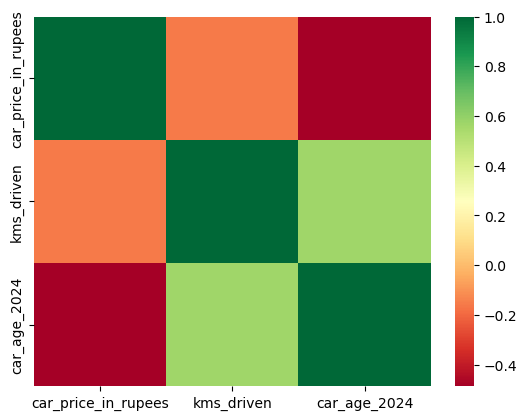

In [28]:
sns.heatmap(datacorr, cmap="RdYlGn",annot=False)
plt.show()

### In the heatmap also we can see that there is a good negative correlation between car price and age,which suggest that the car prices tend to decrease with increase in car age. Price does have a correlation with kms driven but not as strong as the former.

In [29]:
data2=data1.drop("car_name",axis=1)
data2.drop("price_category",axis=1,inplace=True)
data2.head()

,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,manufacturer,car_age_2024
0,445000.0,22402.0,Petrol,Mumbai,2016,Hyundai,8
1,293000.0,10344.0,Petrol,Kolkata,2019,Maruti,5
3,695000.0,45000.0,Petrol,Thane,2016,Maruti,8
4,1200000.0,11193.0,Petrol,Kolkata,2019,Jeep,5
5,372000.0,42906.0,Petrol,Chennai,2017,Maruti,7


In [30]:
### CREATING DUMMY VARIABLES FOR FURTHER ANALYSIS
dummy_data=pd.get_dummies(data2,drop_first=True)
dummy_data.columns

Index(['car_price_in_rupees', 'kms_driven', 'year_of_manufacture',
       'car_age_2024', 'fuel_type_Diesel', 'fuel_type_Diesel + 1',
       'fuel_type_Electric', 'fuel_type_Hybrid', 'fuel_type_LPG',
       'fuel_type_Petrol', 'fuel_type_Petrol + 1', 'city_Ambattur',
       'city_Bangalore', 'city_Chennai', 'city_Delhi', 'city_Faridabad',
       'city_Gurgaon', 'city_Hyderabad', 'city_Kolkata', 'city_Mumbai',
       'city_Noida', 'city_Pallikarnai', 'city_Poonamallee', 'city_Pune',
       'city_Thane', 'city_Thiruvallur', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Isuzu', 'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Pors

In [31]:
dummy_data.head()

,car_price_in_rupees,kms_driven,year_of_manufacture,car_age_2024,fuel_type_Diesel,fuel_type_Diesel + 1,fuel_type_Electric,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Petrol,...,manufacturer_Maruti,manufacturer_Mercedes-Benz,manufacturer_Nissan,manufacturer_Porsche,manufacturer_Renault,manufacturer_Skoda,manufacturer_Tata,manufacturer_Toyota,manufacturer_Volkswagen,manufacturer_Volvo
0,445000.0,22402.0,2016,8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,293000.0,10344.0,2019,5,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,695000.0,45000.0,2016,8,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1200000.0,11193.0,2019,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,372000.0,42906.0,2017,7,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [32]:
#y containing target variable
y=dummy_data.pop('car_price_in_rupees')

#X containing independent variables
X=dummy_data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(1286, 50)
(552, 50)


In [34]:
#Scaling continuous variables
num_vars = ['kms_driven','year_of_manufacture','car_age_2024']

scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [35]:
X_train.describe()

,kms_driven,year_of_manufacture,car_age_2024,fuel_type_Diesel,fuel_type_Diesel + 1,fuel_type_Electric,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Petrol,fuel_type_Petrol + 1,...,manufacturer_Maruti,manufacturer_Mercedes-Benz,manufacturer_Nissan,manufacturer_Porsche,manufacturer_Renault,manufacturer_Skoda,manufacturer_Tata,manufacturer_Toyota,manufacturer_Volkswagen,manufacturer_Volvo
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,...,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,0.370317,0.686674,0.313326,0.227061,0.001555,0.004666,0.001555,0.000778,0.714619,0.006998,...,0.314152,0.005443,0.007776,0.000778,0.037325,0.013997,0.038880,0.033437,0.027216,0.003110
std,0.205322,0.170374,0.170374,0.419095,0.039421,0.068172,0.039421,0.027886,0.451771,0.083396,...,0.464358,0.073606,0.087873,0.027886,0.189631,0.117523,0.193385,0.179845,0.162776,0.055706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205963,0.562500,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.352340,0.687500,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.510596,0.812500,0.437500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.drop("year_of_manufacture",axis=1,inplace=True)

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
#Creating a function to calculate VIFs 
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
    
    
#Creating a function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [39]:
X_train.columns

Index(['kms_driven', 'car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Diesel + 1', 'fuel_type_Electric', 'fuel_type_Hybrid',
       'fuel_type_LPG', 'fuel_type_Petrol', 'fuel_type_Petrol + 1',
       'city_Ambattur', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Faridabad', 'city_Gurgaon', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai', 'city_Noida', 'city_Pallikarnai', 'city_Poonamallee',
       'city_Pune', 'city_Thane', 'city_Thiruvallur', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Isuzu', 'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
 

## MODEL 1

In [40]:
cols = ['kms_driven', 'car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Diesel + 1', 'fuel_type_Electric', 'fuel_type_Hybrid',
       'fuel_type_LPG', 'fuel_type_Petrol', 'fuel_type_Petrol + 1',
       'city_Ambattur', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Faridabad', 'city_Gurgaon', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai', 'city_Noida', 'city_Pallikarnai', 'city_Poonamallee',
       'city_Pune', 'city_Thane', 'city_Thiruvallur', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Isuzu', 'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.713
Model:                             OLS   Adj. R-squared:                  0.702
Method:                  Least Squares   F-statistic:                     62.77
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          7.72e-297
Time:                         14:45:14   Log-Likelihood:                -17681.
No. Observations:                 1286   AIC:                         3.546e+04
Df Residuals:                     1236   BIC:                         3.572e+04
Df Model:                           49                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## MODEL 2 

In [41]:
## REMOVING FEW COLUMNS WITH HIGH P-VALUE
cols = ['kms_driven', 'car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Diesel + 1', 'fuel_type_Electric', 'fuel_type_Hybrid',
       'fuel_type_LPG', 'fuel_type_Petrol', 'fuel_type_Petrol + 1',
       'city_Ambattur', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Faridabad', 'city_Gurgaon', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai', 'city_Noida','city_Poonamallee',
       'city_Pune', 'city_Thane', 'city_Thiruvallur', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Isuzu', 'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.713
Model:                             OLS   Adj. R-squared:                  0.702
Method:                  Least Squares   F-statistic:                     64.13
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          9.60e-298
Time:                         14:45:15   Log-Likelihood:                -17681.
No. Observations:                 1286   AIC:                         3.546e+04
Df Residuals:                     1237   BIC:                         3.571e+04
Df Model:                           48                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## MODEL 3

In [42]:
## REMOVING FEW COLUMNS WITH HIGH P-VALUE
cols = ['kms_driven', 'car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Diesel + 1', 'fuel_type_Electric', 'fuel_type_Hybrid',
       'fuel_type_Petrol', 'fuel_type_Petrol + 1',
       'city_Ambattur', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Faridabad', 'city_Gurgaon', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai', 'city_Noida','city_Poonamallee',
       'city_Pune', 'city_Thane', 'city_Thiruvallur', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.713
Model:                             OLS   Adj. R-squared:                  0.703
Method:                  Least Squares   F-statistic:                     67.02
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          1.49e-299
Time:                         14:45:15   Log-Likelihood:                -17681.
No. Observations:                 1286   AIC:                         3.546e+04
Df Residuals:                     1239   BIC:                         3.570e+04
Df Model:                           46                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## MODEL 4

In [43]:
## REMOVING FEW COLUMNS WITH HIGH P-VALUE
cols = ['kms_driven', 'car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Diesel + 1', 'fuel_type_Electric', 'fuel_type_Hybrid',
       'fuel_type_Petrol', 'fuel_type_Petrol + 1',
       'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Gurgaon', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai', 'city_Noida','city_Poonamallee',
       'city_Thane', 'city_Thiruvallur', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.713
Model:                             OLS   Adj. R-squared:                  0.703
Method:                  Least Squares   F-statistic:                     71.79
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          4.21e-302
Time:                         14:45:16   Log-Likelihood:                -17681.
No. Observations:                 1286   AIC:                         3.545e+04
Df Residuals:                     1242   BIC:                         3.568e+04
Df Model:                           43                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## MODEL 5

In [44]:
## REMOVING FEW COLUMNS WITH HIGH P-VALUE
cols = ['car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Electric',
       'fuel_type_Petrol + 1',
       'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai',
       'city_Thane','manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.708
Model:                             OLS   Adj. R-squared:                  0.700
Method:                  Least Squares   F-statistic:                     86.79
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          1.81e-305
Time:                         14:45:21   Log-Likelihood:                -17692.
No. Observations:                 1286   AIC:                         3.546e+04
Df Residuals:                     1250   BIC:                         3.564e+04
Df Model:                           35                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## MODEL 6

In [45]:
## REMOVING FEW COLUMNS WITH HIGH P-VALUE
cols = ['car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Electric',
       'fuel_type_Petrol + 1',
       'city_Bangalore',
       'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai',
       'city_Thane',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Jaguar', 'manufacturer_Jeep',
       'manufacturer_Kia', 'manufacturer_Land', 'manufacturer_MG',
       'manufacturer_MINI', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.705
Model:                             OLS   Adj. R-squared:                  0.698
Method:                  Least Squares   F-statistic:                     100.0
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          2.44e-307
Time:                         14:45:24   Log-Likelihood:                -17699.
No. Observations:                 1286   AIC:                         3.546e+04
Df Residuals:                     1255   BIC:                         3.562e+04
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

## MODEL 7

In [46]:
## REMOVING FEW COLUMNS WITH HIGH P-VALUE
cols = ['car_age_2024', 'fuel_type_Diesel',
       'fuel_type_Electric',
       'city_Bangalore',
       'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai',
       'city_Thane',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Ford', 'manufacturer_Honda', 'manufacturer_Hyundai',
       'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Nissan',
       'manufacturer_Porsche', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen']
build_model(cols)
get_vif(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.699
Model:                             OLS   Adj. R-squared:                  0.693
Method:                  Least Squares   F-statistic:                     117.1
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          5.97e-307
Time:                         14:45:25   Log-Likelihood:                -17712.
No. Observations:                 1286   AIC:                         3.548e+04
Df Residuals:                     1260   BIC:                         3.561e+04
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [47]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)


1805543.2473794543 [-1115926.12163121   190773.27697383   343713.89867665   104819.85753009
   102342.43434047   -70456.93201332    68754.834349      77885.00141832
  -839414.03814977 -1212251.28634907  -900970.7587806   -891566.84943675
  -762637.0025957   -823815.85004417  -293400.32389741 -1324651.5930773
  -586151.76035112  -946436.16280407  -873164.79174412 -1551052.48217556
 -1099541.45140664  -471022.15658903  -783245.12889317  -410314.70854296
  -842873.22482671]


## RESIDUAL ANALYSIS

In [48]:
y_train_pred = lr.predict(X_train[cols])

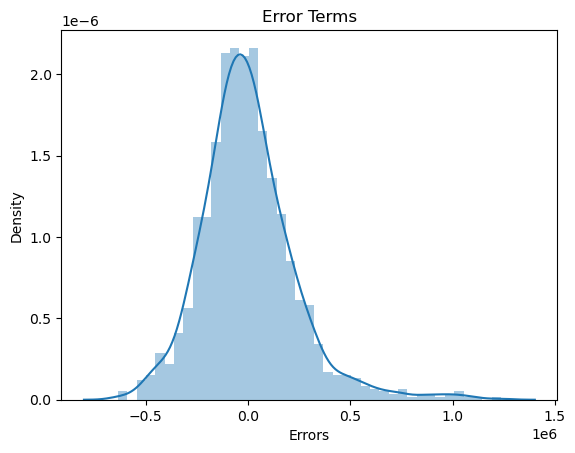

In [49]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)
plt.show()

## MODEL EVALUATION

In [50]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.6990458500368155

In [51]:
#Scale variables in X_test
num_vars = ['kms_driven','year_of_manufacture','car_age_2024']

#Test data to be transformed 
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [52]:
#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test set prediction

In [53]:
# R squared value between test actual and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.6192779809518834

In [54]:
#evaluation as per problem statement
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.6192779809518834

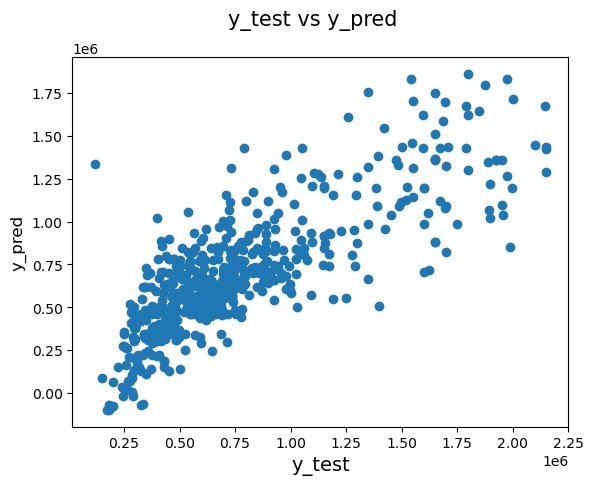

In [55]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

In [56]:
#Let us rebuild the final and interpret it
lm = build_model(cols)

                             OLS Regression Results                            
Dep. Variable:     car_price_in_rupees   R-squared:                       0.699
Model:                             OLS   Adj. R-squared:                  0.693
Method:                  Least Squares   F-statistic:                     117.1
Date:                 Thu, 21 Nov 2024   Prob (F-statistic):          5.97e-307
Time:                         14:45:27   Log-Likelihood:                -17712.
No. Observations:                 1286   AIC:                         3.548e+04
Df Residuals:                     1260   BIC:                         3.561e+04
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

## 	Key Impacts on Car Prices:
### 	1-Age of Vehicle: The single most important factor. Older vehicles lose significant value yearly.
####         1.1-	For every additional year, the car price decreases by approximately ₹1.1 million.
####         1.2- Older cars depreciate significantly, aligning with industry trends.


### 	2-Electric Vehicles: Currently command higher prices due to technological advancements and demand.
####        2.1-Highlights the premium pricing of electric vehicles.
####        2.2-Reflects the preference for diesel vehicles in certain segments.


### 	3-City Variations: Regional preferences and economic conditions affect prices. 
####        3.1-Cities like Bangalore and    Hyderabad have premium demand.
####        3.2-Indicates demand and market dynamics differ across regions.

### 	4-Brand Perception: Luxury brands depreciate faster.
####       4.1-Limited demand for pre-owned vehicles in that segment. Largest price reductions seen for Land Rover and Porsche
####       4.2-Mainstream manufacturers(Hyundai,Honda) retain value better.

In [59]:
X_train.head()

,kms_driven,car_age_2024,fuel_type_Diesel,fuel_type_Diesel + 1,fuel_type_Electric,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Petrol,fuel_type_Petrol + 1,city_Ambattur,...,manufacturer_Maruti,manufacturer_Mercedes-Benz,manufacturer_Nissan,manufacturer_Porsche,manufacturer_Renault,manufacturer_Skoda,manufacturer_Tata,manufacturer_Toyota,manufacturer_Volkswagen,manufacturer_Volvo
2005,0.099256,0.0625,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1666,0.287266,0.4375,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0.324480,0.3125,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,0.123437,0.0625,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0.765645,0.5625,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
res=y_train-y_train_pred
res.shape

(1286,)

In [63]:
X_train.shape

(1286, 49)